In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
     
    

In [38]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [39]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.506127,-0.935291,-0.035983,3.633469,0.820331,1
1,-1.564257,-0.655046,0.112176,2.364457,1.278041,1
2,-1.682812,-0.812251,0.120266,2.251985,0.832486,1
3,-1.580586,-1.353005,-0.518235,1.306806,0.630109,1
4,-1.567845,-0.493702,0.410403,2.090203,1.346060,1


In [40]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

In [41]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [42]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [54]:
df1=sample_rows(df,0.2)#dataset 1 that we give to decision tree 1

In [55]:
df2=sample_rows(df,0.2)#dataset 2 that we give to decision tree 2

In [56]:
df3=sample_rows(df,0.2)#dataset 3 that we give to decision tree 3

In [57]:
df1.shape

(20, 6)

In [58]:
df2.shape

(20, 6)

In [59]:
df3.shape

(20, 6)

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
     

In [61]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.411\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.4, 0.5, 'x[1] <= -1.523\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

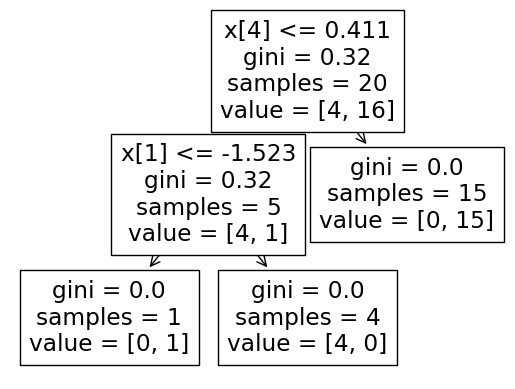

In [62]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[4] <= 0.389\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]')]

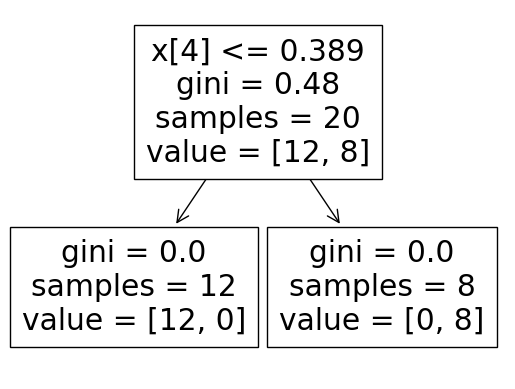

In [63]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.161\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.4, 0.5, 'x[2] <= 1.387\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

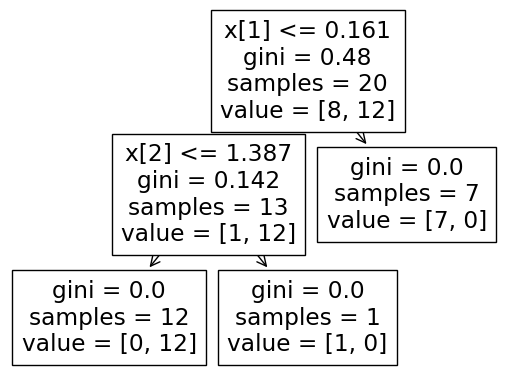

In [65]:
plot_tree(clf3)

In [66]:
clf1.predict(np.array([-2.506127, -0.935291, -0.035983, 3.633469, 0.820331]).reshape(1,5))

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [68]:
clf2.predict(np.array([-2.506127, -0.935291, -0.035983, 3.633469, 0.820331]).reshape(1,5))

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [70]:
clf3.predict(np.array([-2.506127, -0.935291, -0.035983, 3.633469, 0.820331]).reshape(1,5))

C:\Users\AKSHATA\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### Same we can use for column sampling and both column and row sampling